
## What Predicts a Country's Winning Rate?

#### Factors for Analysis
- Country's GDP and the number of medals won
- Does a larger population size result in more medals?

### 1. Country's GDP and the number of medals won

- Quantifying olympic performance. 
    - To measure Olympic achievements, we can analyze them based on the total number of medals or assign scores to each medal (gold: 3, silver: 2, bronze: 1).
- Simplifying the Data for Visualization
    - To simplify the data, aggregate data by decade
    - Focus on a subset of countires that have won the most medals or have shown significant changes

- Graph(Example)
    - X-Axis: GDP growth rate
    - Y-Axis: Total number of medals won in the decade
    - Point: Represents a country

- From the graph, we should see at a glance: 

    - Trends: Do countries with higher GDP growth tend to win more medals?
    - Outliers: Are there countries that do not follow the general trend?
    - Change over time: How does the relationship between GDP growth and Olympic success change from decade to decade? 

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1. Cleaning the data

In [130]:
# Load the datasets
athelet_df = pd.read_csv('data/athlete_events.csv')
gdp_df = pd.read_csv('data/gdp_data.csv', skiprows=4)


## Cleaning datasets

# Transform GDP data using melt - create new columns 'Year' and 'GDP'
gdp_data_long = gdp_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                             var_name='Year', value_name='GDP')
# Delete unnecessary data
gdp_data_long = gdp_data_long[gdp_data_long['Year'] != 'Unnamed: 67']
gdp_df = gdp_data_long
# Convert year values into an integer type
gdp_data_long['Year'] = gdp_data_long['Year'].astype(int)

# Rename columns
gdp_df = gdp_df.rename(columns={
    'Country Name': 'CountryName',
    'Country Code': 'CountryCode',
    'Indicator Name': 'IndicatorName',
    'Indicator Code': 'IndicatorCode',
})

athelet_df = athelet_df.rename(columns={
    'Team': 'CountryName'
})

## Quentify each country's performance of Olympic

# Define a dict that maps medals to points
medal_to_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1}

# Assign points to each medal in the DataFrame
athelet_df['Points'] = athelet_df['Medal'].map(medal_to_points)

#Check each dataset
print('GDP data:: \n', gdp_df.head())
print('\nOlympic data:: \n', athelet_df.head())

gdp_df.to_csv('data/cleaned_data/gdp_df.csv')
gdp_df.to_csv('data/cleaned_data/athelte_df.csv')

GDP data:: 
                    CountryName CountryCode      IndicatorName   IndicatorCode  \
0                        Aruba         ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1  Africa Eastern and Southern         AFE  GDP (current US$)  NY.GDP.MKTP.CD   
2                  Afghanistan         AFG  GDP (current US$)  NY.GDP.MKTP.CD   
3   Africa Western and Central         AFW  GDP (current US$)  NY.GDP.MKTP.CD   
4                       Angola         AGO  GDP (current US$)  NY.GDP.MKTP.CD   

   Year           GDP  
0  1960           NaN  
1  1960  2.112502e+10  
2  1960  5.377778e+08  
3  1960  1.044764e+10  
4  1960           NaN  

Olympic data:: 
    ID                      Name Sex   Age  Height  Weight     CountryName  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aaby

In [131]:
## Combine two datasets 

# Select columns what we need
athelet_df = athelet_df[['Name', 'CountryName', 'Year', 'Medal', 'Points']]
gdp_df = gdp_df[['CountryName', 'Year', 'GDP']]


# Dropping rows where value is NA
#athelet_df.dropna(subset=['Medal'], inplace=True)
gdp_df.dropna(subset=['GDP'], inplace=True)

# Merging datasets on 'Team' and 'Year'
merged_olympic_gdp_df = pd.merge(athelet_df, gdp_df, on=['CountryName', 'Year'])

# check the dataset
print(merged_olympic_gdp_df.shape)
print(merged_olympic_gdp_df.head())
#merged_olympic_gdp_df.to_csv('data/cleaned_data/merged_olympic_gdp_df.csv')


(149157, 6)
             Name CountryName  Year Medal  Points           GDP
0       A Dijiang       China  1992   NaN     NaN  4.269157e+11
1  Bai Chongguang       China  1992   NaN     NaN  4.269157e+11
2         Bai Mei       China  1992   NaN     NaN  4.269157e+11
3        Bi Zhong       China  1992   NaN     NaN  4.269157e+11
4      Cai Yanshu       China  1992   NaN     NaN  4.269157e+11


In [132]:
## Simplifying data(year -> decade)

# Copy merged data
olympic_gdp_df = merged_olympic_gdp_df.copy()

# Create a new column 'Decade'
olympic_gdp_df['Decade'] = (olympic_gdp_df['Year'] // 10) * 10

# For medal counts
# Aggregate the total num of medals by decade for each country
country_medals_decade = olympic_gdp_df.groupby(['CountryName', 'Decade'])['Medal'].count().reset_index()
# Aggregate total medals by decade regardless of country
total_medals_decade = olympic_gdp_df.groupby('Decade')['Medal'].count().reset_index()

# For medal points
# Aggregate the total num of medals by decade for each country
country_mpoints_decade = olympic_gdp_df.groupby(['CountryName', 'Decade'])['Points'].count().reset_index()
# Aggregate total medals by decade regardless of country
total_mpoints_decade = olympic_gdp_df.groupby('Decade')['Points'].count().reset_index()


# Sum the GDP by decade for each country
country_gdp_decade = olympic_gdp_df.groupby(['CountryName', 'Decade'])['GDP'].mean().reset_index()
# Sum the GDP by decade regardless of country
total_gdp_decade = olympic_gdp_df.groupby('Decade')['GDP'].mean().reset_index()


# # Check the result
print("Medal counts by Decade(each country):\n", country_medals_decade)
print("Medal counts by Decade:\n", total_medals_decade)
print("Medal points by Decade(each country):\n", country_mpoints_decade)
print("Medal points by Decade:\n", total_mpoints_decade)
print("Average GDP by Decade(each country):\n", country_gdp_decade)
print("Average GDP by Decade:\n", total_gdp_decade)

# country_medals_decade.to_csv('data/cleaned_data/country_medals_decade.csv')
# total_medals_decade.to_csv('data/cleaned_data/total_medals_decade.csv')
# country_mpoints_decade.to_csv('data/cleaned_data/country_mpoints_decade.csv')
# total_mpoints_decade.to_csv('data/cleaned_data/total_mpoints_decade.csv')
# country_gdp_decade.to_csv('data/cleaned_data/country_gdp_decade.csv')
# total_gdp_decade.to_csv('data/cleaned_data/total_gdp_decade.csv')


Medal counts by Decade(each country):
      CountryName  Decade  Medal
0    Afghanistan    1960      0
1    Afghanistan    1970      0
2    Afghanistan    1980      0
3    Afghanistan    2000      1
4    Afghanistan    2010      1
..           ...     ...    ...
780     Zimbabwe    1960      0
781     Zimbabwe    1980     15
782     Zimbabwe    1990      0
783     Zimbabwe    2000      7
784     Zimbabwe    2010      0

[785 rows x 3 columns]
Medal counts by Decade:
    Decade  Medal
0    1960   1635
1    1970   1029
2    1980   2363
3    1990   3594
4    2000   5625
5    2010   4061
Medal points by Decade(each country):
      CountryName  Decade  Points
0    Afghanistan    1960       0
1    Afghanistan    1970       0
2    Afghanistan    1980       0
3    Afghanistan    2000       1
4    Afghanistan    2010       1
..           ...     ...     ...
780     Zimbabwe    1960       0
781     Zimbabwe    1980      15
782     Zimbabwe    1990       0
783     Zimbabwe    2000       7
784    

### 2. Creating The Graph

In [117]:
# ## Graph of the number of Olympic medals earned by each country by decade

# # pivot the data(each row represents a country and each column represents a decade)
# medals_pivot = country_mpoints_decade.pivot(index='CountryName', columns='Decade', values='Points').fillna(0)
# top_n = 20

# # Sort by the total medals for focusing on top performing countries
# medals_pivot['Total'] = medals_pivot.sum(axis=1)
# medals_pivot_sorted = medals_pivot.sort_values(by='Total', ascending=False).head(top_n)
# # drop 'Total'(unnecessary)
# medals_pivot_sorted.drop(columns='Total', inplace=True)

# # Plot the bar chart
# medals_pivot_sorted.plot(kind='bar', stacked=True, figsize=(14, 7))
# plt.xlabel('Country')
# plt.ylabel('Medals Won')
# plt.title(f'Total Olympic Medals by top {top_n} Country and Decade')
# plt.legend(title='Decade')
# plt.show()


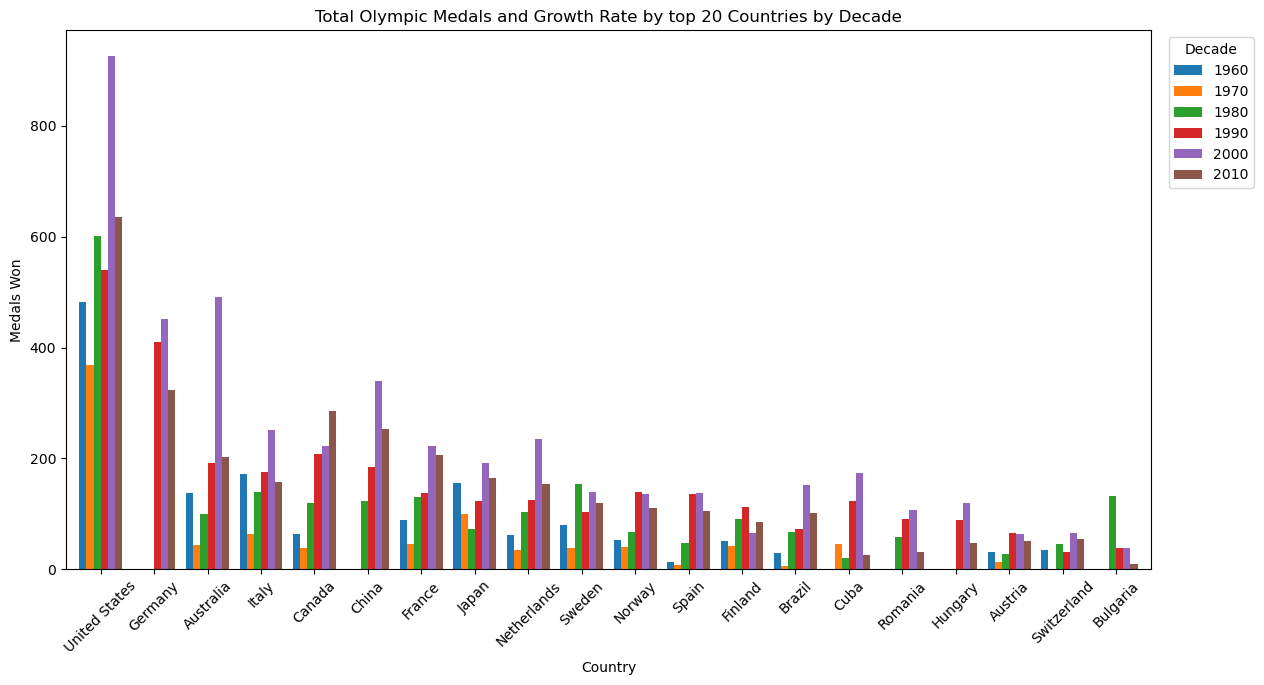

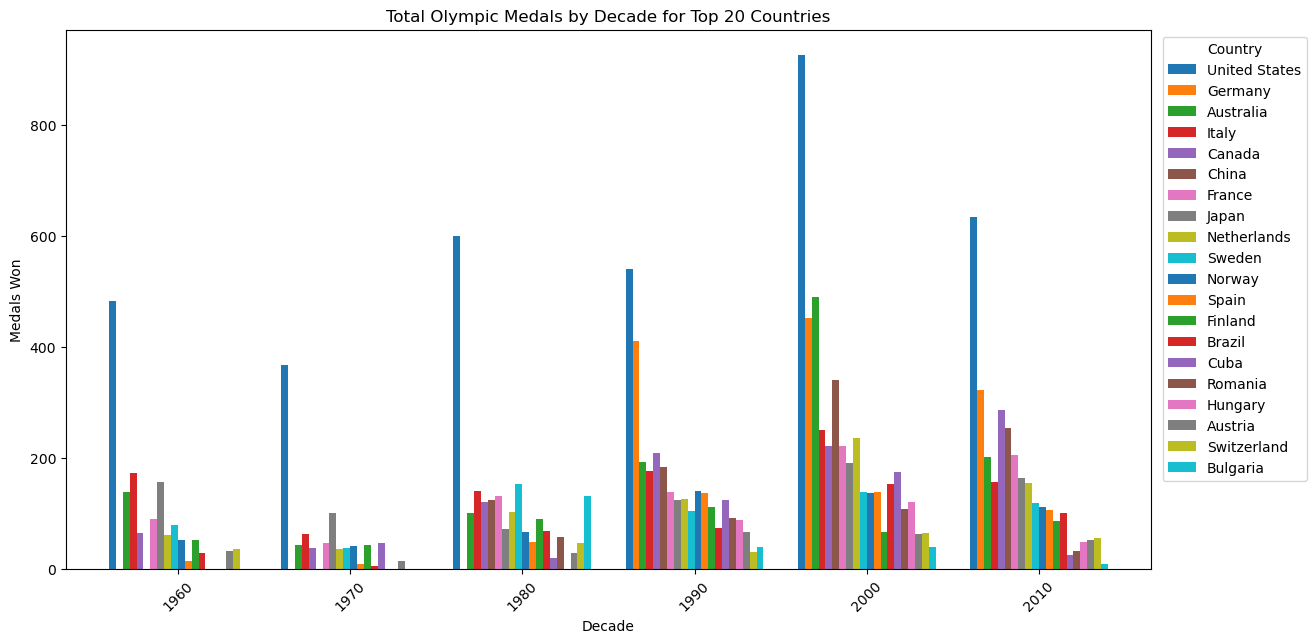

In [118]:
### Graph of the number of Olympic medals earned by each country by decade

## x-axis labels: country name
# pivot the data(each row represents a country and each column represents a decade)
medals_pivot = country_mpoints_decade.pivot(index='CountryName', columns='Decade', values='Points').fillna(0)
top_n = 20

# Plotting medals won
fig, ax1 = plt.subplots(figsize=(14, 7))

# Sort by the total medals for focusing on top performing countries
medals_pivot['Total'] = medals_pivot.sum(axis=1)
medals_pivot_sorted = medals_pivot.sort_values(by='Total', ascending=False).head(top_n)
# drop 'Total'(unnecessary)
medals_pivot_sorted.drop(columns='Total', inplace=True)

# Bar chart for medals
medals_pivot_sorted.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_xlabel('Country')
ax1.set_ylabel('Medals Won', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title(f'Total Olympic Medals and Growth Rate by top {top_n} Countries by Decade')
plt.xticks(rotation=45)

# Legend and show plot
ax1.legend(loc='upper left', title='Decade', bbox_to_anchor=(1.01, 1))
plt.show()


## x-axis labels: decade
# Pivot the data
medals_pivot = country_mpoints_decade.pivot(index='CountryName', columns='Decade', values='Points').fillna(0)
top_n = 20

#  Sort by total medals
# axis=1 : across columns summation
medals_pivot['Total'] = medals_pivot.sum(axis=1)
medals_pivot_sorted = medals_pivot.sort_values(by='Total', ascending=False).head(top_n)
# Drop 'Total'
medals_pivot_sorted.drop(columns='Total', inplace=True)

# Transpose the DataFrame to have countries as columns and decades as rows
medals_pivot_transposed = medals_pivot_sorted.transpose()

# Plotting medals won
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for medals
medals_pivot_transposed.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_xlabel('Decade')
ax1.set_ylabel('Medals Won', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title(f'Total Olympic Medals by Decade for Top {top_n} Countries')
plt.xticks(rotation=45)

# Legend and show plot
ax1.legend(loc='upper right', title='Country', bbox_to_anchor=(1.15, 1))
plt.show()


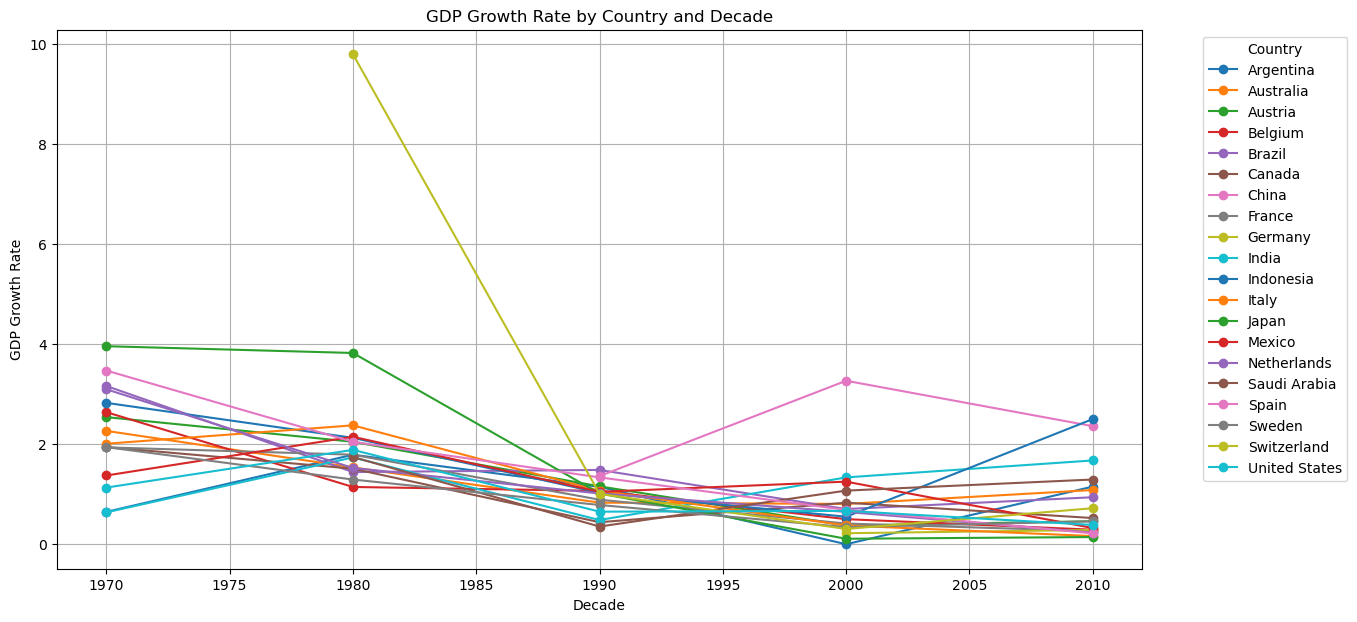

In [119]:
## Graph for the number of Olympic medals earned by each country by decade

# Calculate the GDP growth rate for each country per decade
country_gdp_decade = country_gdp_decade.sort_values(by=['CountryName', 'Decade'])
country_gdp_decade['GDP Growth Rate'] = country_gdp_decade.groupby('CountryName')['GDP'].pct_change()

# Filter for the top countries by total GDP
top_countries_by_gdp = country_gdp_decade.groupby('CountryName')['GDP'].sum().nlargest(20).index
top_country_gdp_growth = country_gdp_decade[country_gdp_decade['CountryName'].isin(top_countries_by_gdp)]

# Pivot the data for plotting
gdp_growth_pivot = top_country_gdp_growth.pivot(index='Decade', columns='CountryName', values='GDP Growth Rate')

# Plot a line graph
fig, ax = plt.subplots(figsize=(14, 7))
gdp_growth_pivot.plot(kind='line', marker='o', ax=ax)
plt.xlabel('Decade')
plt.ylabel('GDP Growth Rate')
plt.title('GDP Growth Rate by Country and Decade')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


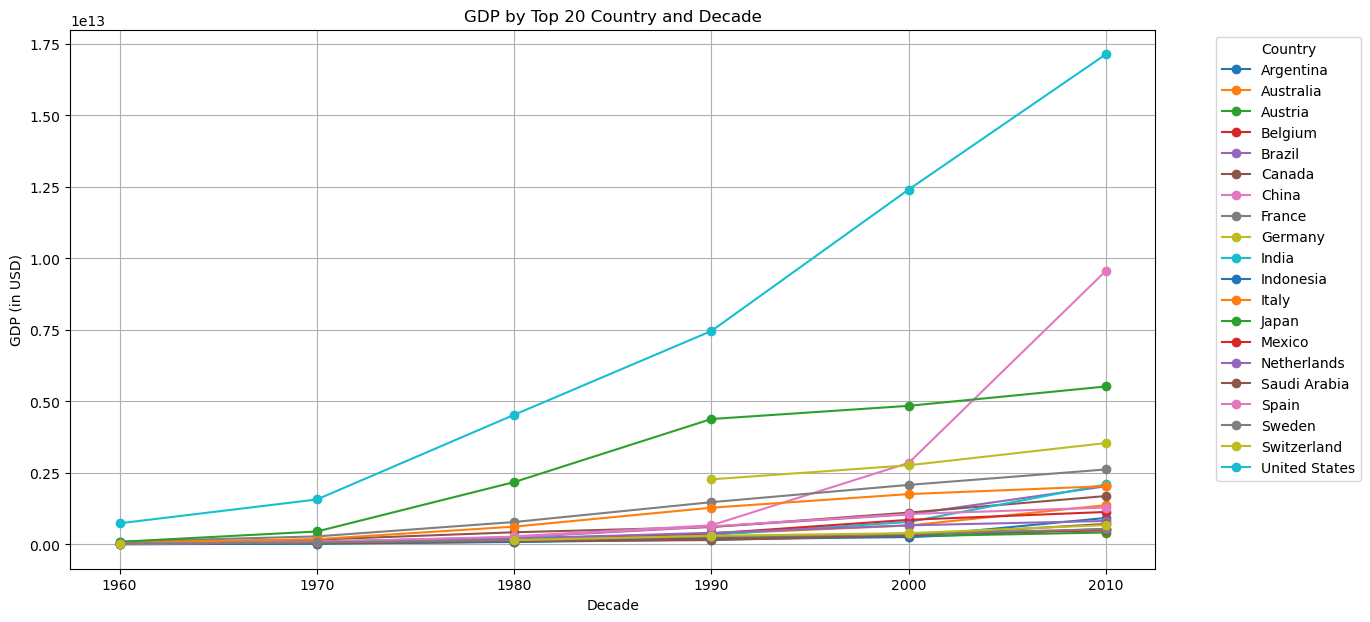

In [120]:
## Graph for GDP growth rate by country and decade

# Filter for the top countries by total GDP
top_n = 20
top_countries_by_gdp = country_gdp_decade.groupby('CountryName')['GDP'].sum().nlargest(top_n).index
top_country_gdp = country_gdp_decade[country_gdp_decade['CountryName'].isin(top_countries_by_gdp)]

# Pivot the data for plotting
gdp_pivot = top_country_gdp.pivot(index='Decade', columns='CountryName', values='GDP')

# Plot a line graph
fig, ax = plt.subplots(figsize=(14, 7))
gdp_pivot.plot(kind='line', marker='o', ax=ax)

plt.xlabel('Decade')
plt.ylabel('GDP (in USD)')
plt.title(f'GDP by Top {top_n} Country and Decade')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


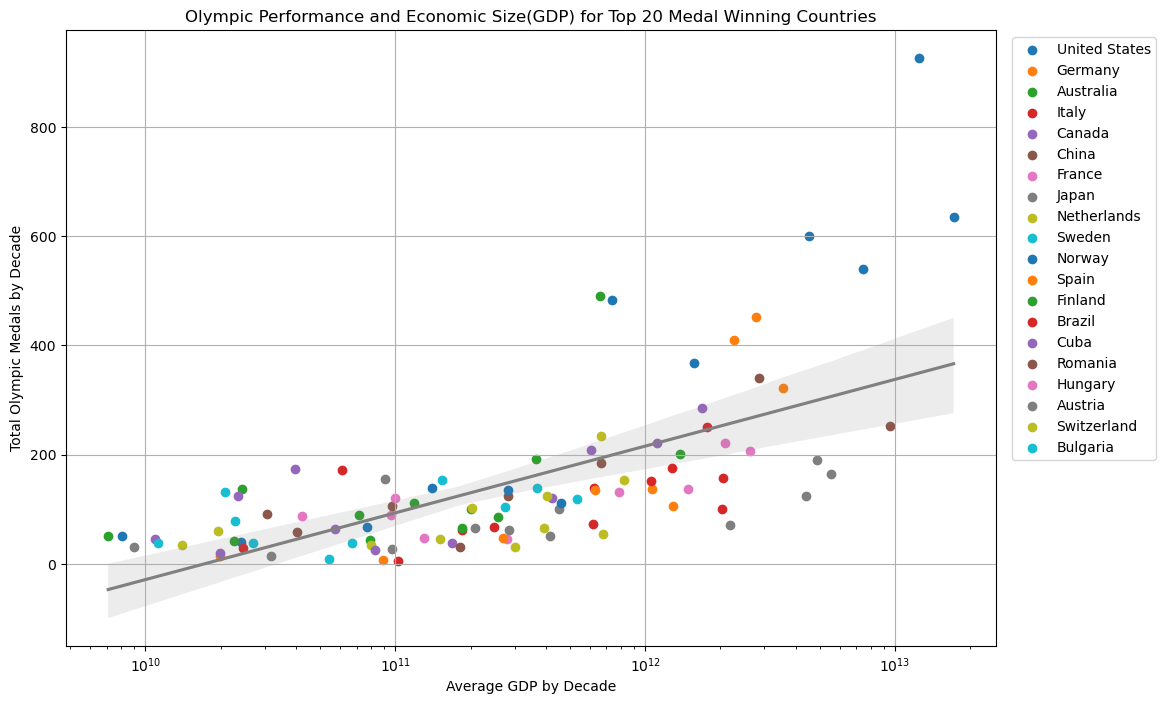

In [121]:
## Graph for Correlation between GDP and medal counts

top_n = 20
# Sort by total medals to get the top countries
top_countries_by_medals = country_mpoints_decade.groupby('CountryName')['Points'].sum().nlargest(top_n).index

# Filter only the top countries by total medals
top_countries_df = olympic_gdp_df[olympic_gdp_df['CountryName'].isin(top_countries_by_medals)]

# Recalculate
top_country_medals_decade = top_countries_df.groupby(['CountryName', 'Decade'])['Points'].count().reset_index()

# Calculate the average GDP
top_country_gdp_decade = top_countries_df.groupby(['CountryName', 'Decade'])['GDP'].mean().reset_index()

# Merge the medal counts and GDP data
top_countries_merged = pd.merge(top_country_medals_decade, top_country_gdp_decade, on=['CountryName', 'Decade'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
for country in top_countries_by_medals:
    country_data = top_countries_merged[top_countries_merged['CountryName'] == country]
    plt.scatter(country_data['GDP'], country_data['Points'], label=country)

# Add a regression line
sns.regplot(data=top_countries_merged, x='GDP', y='Points', scatter=False, color='gray', logx=True)

plt.xlabel('Average GDP by Decade')
# Set the x-axis to a logarithmic scale(because data points are clustered around a specific val)
plt.xscale('log')
plt.ylabel('Total Olympic Medals by Decade')
plt.title(f'Olympic Performance and Economic Size(GDP) for Top {top_n} Medal Winning Countries')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.grid(True)
plt.show()

# # Check the data
# print("Top 20 Countries' Medal Counts by Decade:\n", top_country_medals_decade)
# print("Top 20 Countries' Average GDP by Decade:\n", top_country_gdp_decade)


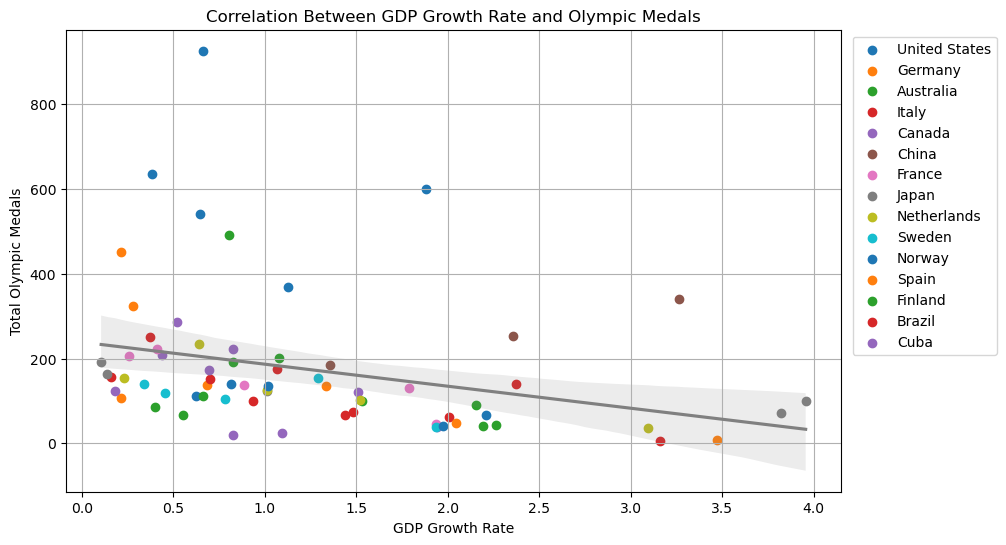

In [122]:
## Graph for Correlation between GDP growth rate and medal counts

# Calculate GDP growth rate for each country in each decade
# .pct_change():calculates the percentage change between the current and a prior element
country_gdp_yearly = olympic_gdp_df.groupby(['CountryName', 'Decade'])['GDP'].mean().reset_index()
country_gdp_yearly['GDP Growth Rate'] = country_gdp_yearly.groupby('CountryName')['GDP'].pct_change()

# Filter for top-performing countries in terms of total medals
top_countries = country_mpoints_decade.groupby('CountryName')['Points'].sum().nlargest(15).index
filtered_medals = country_mpoints_decade[country_mpoints_decade['CountryName'].isin(top_countries)]
filtered_gdp = country_gdp_yearly[country_gdp_yearly['CountryName'].isin(top_countries)]

# Merging medal and GDP data
medals_gdp_merged = pd.merge(filtered_medals, filtered_gdp, on=['CountryName', 'Decade'])

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
for country in top_countries:
    country_data = medals_gdp_merged[medals_gdp_merged['CountryName'] == country]
    plt.scatter(country_data['GDP Growth Rate'], country_data['Points'], label=country)
    
# Add a regression line
sns.regplot(data=medals_gdp_merged, x='GDP Growth Rate', y='Points', scatter=False, color='grey')

plt.xlabel('GDP Growth Rate')
plt.ylabel('Total Olympic Medals')
plt.title('Correlation Between GDP Growth Rate and Olympic Medals')
plt.legend(bbox_to_anchor=(1.21, 1))
plt.grid(True)
plt.show()


### 2. Population size and the number of medals won

 
- Quantifying olympic performance. 
    - Medal Count: One straightforward way is to simply count the total number of medals (gold, silver, bronze) won by each country.
    - Weighted Scoring: Alternatively, assign different values to each type of medal (e.g., gold: 3, silver: 2, bronze: 1).

- Simplifying the Data for Visualization
    - Instead of yearly data, sum the total medals or scores for each country for each decade (1960-1969, 1970-1979).
    - To manage the complexity, focus on a subset of countries. (e.g., Top 10 countries)

- Graph
    - X-Axis: Population in the decade
    - Y-Axis: Total number of medals won in the decade
    - Point: Represents a country


In [123]:
# Load the dataset
population_pf = pd.read_csv('data/world_population.csv')

# The columns want to keep
id_vars = ['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent']
# The columns to melt into long format
value_vars = ['2020 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']

# Melt the dataframe('Year' and 'Population')
population_data_long = pd.melt(population_pf, id_vars=id_vars, value_vars=value_vars, var_name='Decade', value_name='Population')
# Delete 'Population' from the values under the 'Year' column (row data: 1970 Population -> 1970) and convert type into int
population_data_long['Decade'] = population_data_long['Decade'].str.replace(' Population', '').astype(int)
population_pf = population_data_long

# Rename columns
population_pf = population_pf.rename(columns={
    'Country/Territory': 'CountryName',
    'CCA3': 'CountryCode'
})

# Check the data
print('Country Medals Decade Data:: \n', country_medals_decade)
print('Population Data:: \n', population_pf)

Country Medals Decade Data:: 
      CountryName  Decade  Medal
0    Afghanistan    1960      0
1    Afghanistan    1970      0
2    Afghanistan    1980      0
3    Afghanistan    2000      1
4    Afghanistan    2010      1
..           ...     ...    ...
780     Zimbabwe    1960      0
781     Zimbabwe    1980     15
782     Zimbabwe    1990      0
783     Zimbabwe    2000      7
784     Zimbabwe    2010      0

[785 rows x 3 columns]
Population Data:: 
       Rank CountryCode        CountryName           Capital Continent  Decade  \
0       36         AFG        Afghanistan             Kabul      Asia    2020   
1      138         ALB            Albania            Tirana    Europe    2020   
2       34         DZA            Algeria           Algiers    Africa    2020   
3      213         ASM     American Samoa         Pago Pago   Oceania    2020   
4      203         AND            Andorra  Andorra la Vella    Europe    2020   
...    ...         ...                ...              

In [133]:
## Combine two datasets

# select columns what we need
population_pf = population_pf[['CountryName', 'Decade', 'Population', 'Continent']]

# Dropping rows where value is NA
population_pf.dropna(subset=['Population'])

# Merging datasets on 'Country' and 'Year'
merged_olympic_pop_df = pd.merge(country_mpoints_decade, population_pf, on=['CountryName', 'Decade'])

# check the dataset
print(merged_olympic_pop_df.shape)
print(merged_olympic_pop_df)
#merged_olympic_pop_df.to_csv('data/cleaned_data/merged_olympic_pop_df.csv')
 

(697, 5)
     CountryName  Decade  Points  Population Continent
0    Afghanistan    1970       0    10752971      Asia
1    Afghanistan    1980       0    12486631      Asia
2    Afghanistan    2000       1    19542982      Asia
3    Afghanistan    2010       1    28189672      Asia
4        Albania    1990       0     3295066    Europe
..           ...     ...     ...         ...       ...
692       Zambia    2010       0    13792086    Africa
693     Zimbabwe    1980      15     7049926    Africa
694     Zimbabwe    1990       0    10113893    Africa
695     Zimbabwe    2000       7    11834676    Africa
696     Zimbabwe    2010       0    12839771    Africa

[697 rows x 5 columns]


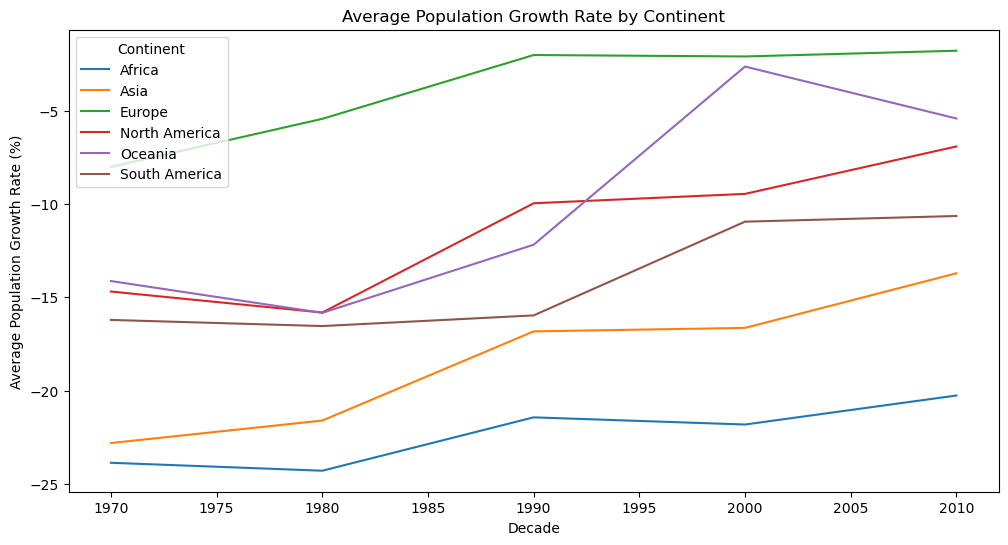

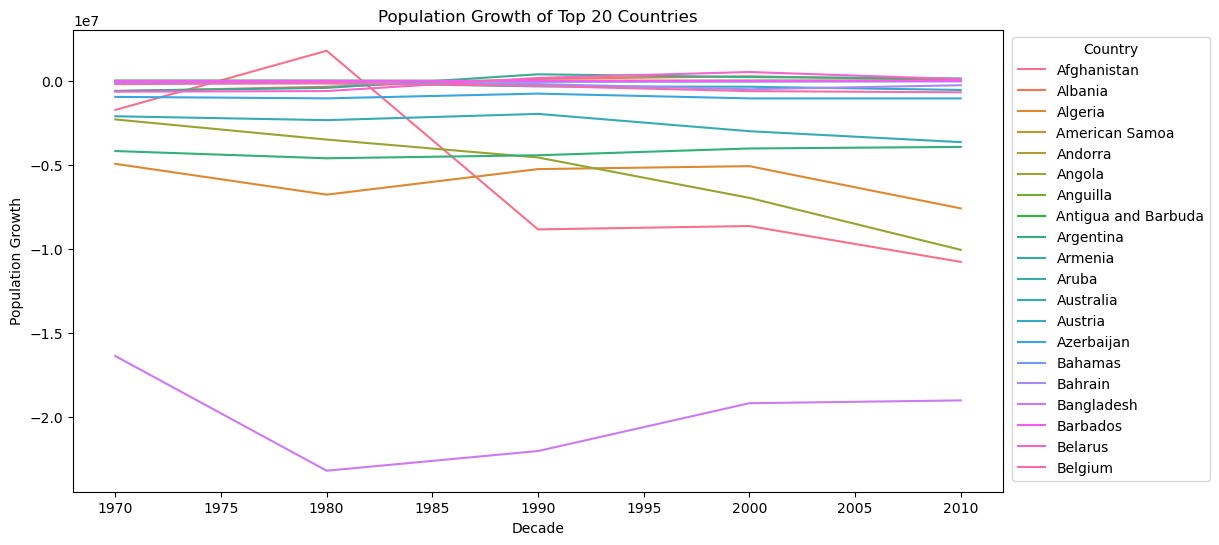

In [125]:
# Graph for growth rate
# Graph1. Group by Continent and plot average growth rate per decade

population_pf['PopulationGrowth'] = population_pf.groupby('CountryName')['Population'].diff()
population_pf['PopulationGrowthRate'] = population_pf.groupby('CountryName')['Population'].pct_change() * 100

continent_avg_growth = population_pf.groupby(['Continent', 'Decade'])['PopulationGrowthRate'].mean().reset_index()

plt.figure(figsize=(12, 6))
# Plotting Population Growth for each country
sns.lineplot(data=continent_avg_growth, x='Decade', y='PopulationGrowthRate', hue='Continent')
plt.title('Average Population Growth Rate by Continent')
plt.xlabel('Decade')
plt.ylabel('Average Population Growth Rate (%)')
plt.legend(title='Continent')
plt.show()

# Graph 2. Select Top N Countries(recent population growth)
top_n = 20
top_countries = population_pf[population_pf['Decade'] == population_pf['Decade'].max()].nlargest(top_n, 'PopulationGrowth')['CountryName']
top_countries_data = population_pf[population_pf['CountryName'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_countries_data, x='Decade', y='PopulationGrowth', hue='CountryName')
plt.title(f'Population Growth of Top {top_n} Countries')
plt.xlabel('Decade')
plt.ylabel('Population Growth')
plt.legend(title='Country', bbox_to_anchor=(1.23, 1))
plt.show()


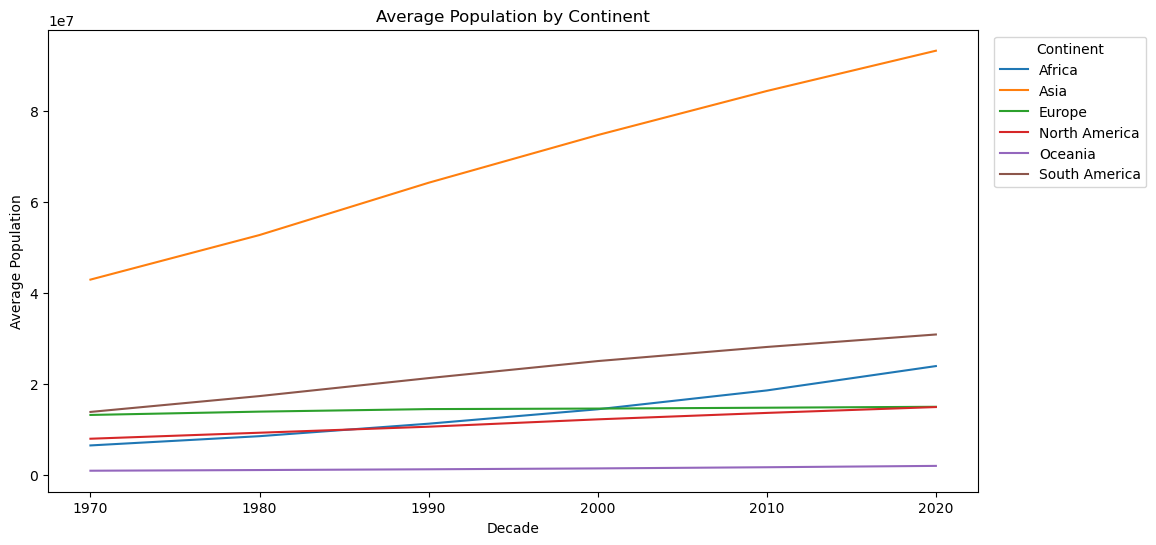

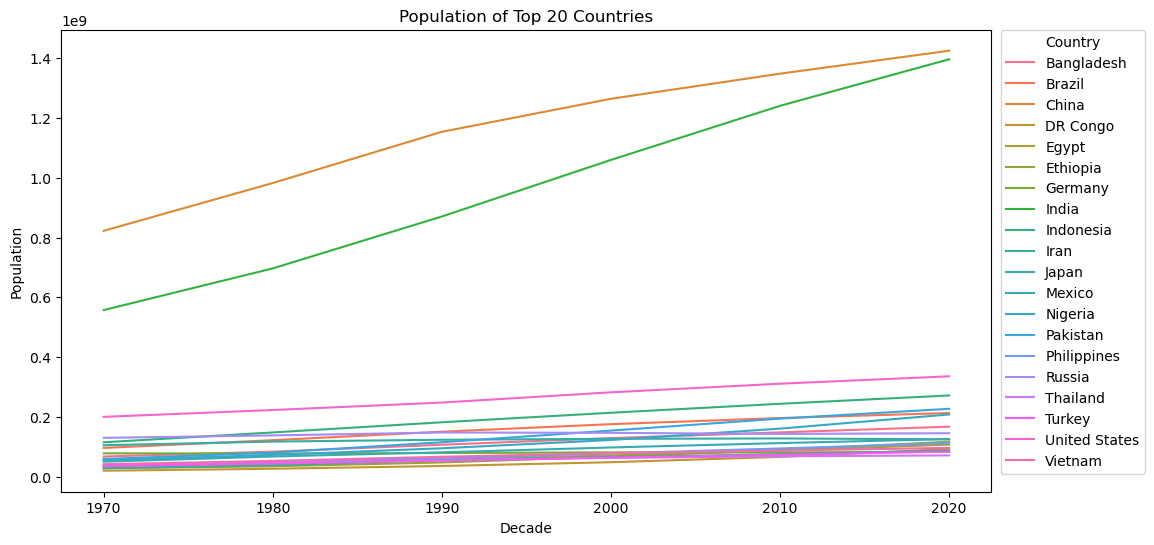

In [126]:
# Graph for population size

# 1. Continent average population per decade
continent_avg_population = population_pf.groupby(['Continent', 'Decade'])['Population'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=continent_avg_population, x='Decade', y='Population', hue='Continent')
plt.title('Average Population by Continent')
plt.xlabel('Decade')
plt.ylabel('Average Population')
plt.legend(title='Continent', loc=2, bbox_to_anchor=(1.01, 1))
plt.show()

# 2. Select Top N Countries(recent population size)
n = 20
top_countries = population_pf[population_pf['Decade'] == population_pf['Decade'].max()].nlargest(n, 'Population')['CountryName']
top_countries_data = population_pf[population_pf['CountryName'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_countries_data, x='Decade', y='Population', hue='CountryName')
plt.title(f'Population of Top {n} Countries')
plt.xlabel('Decade')
plt.ylabel('Population')
plt.legend(title='Country', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()


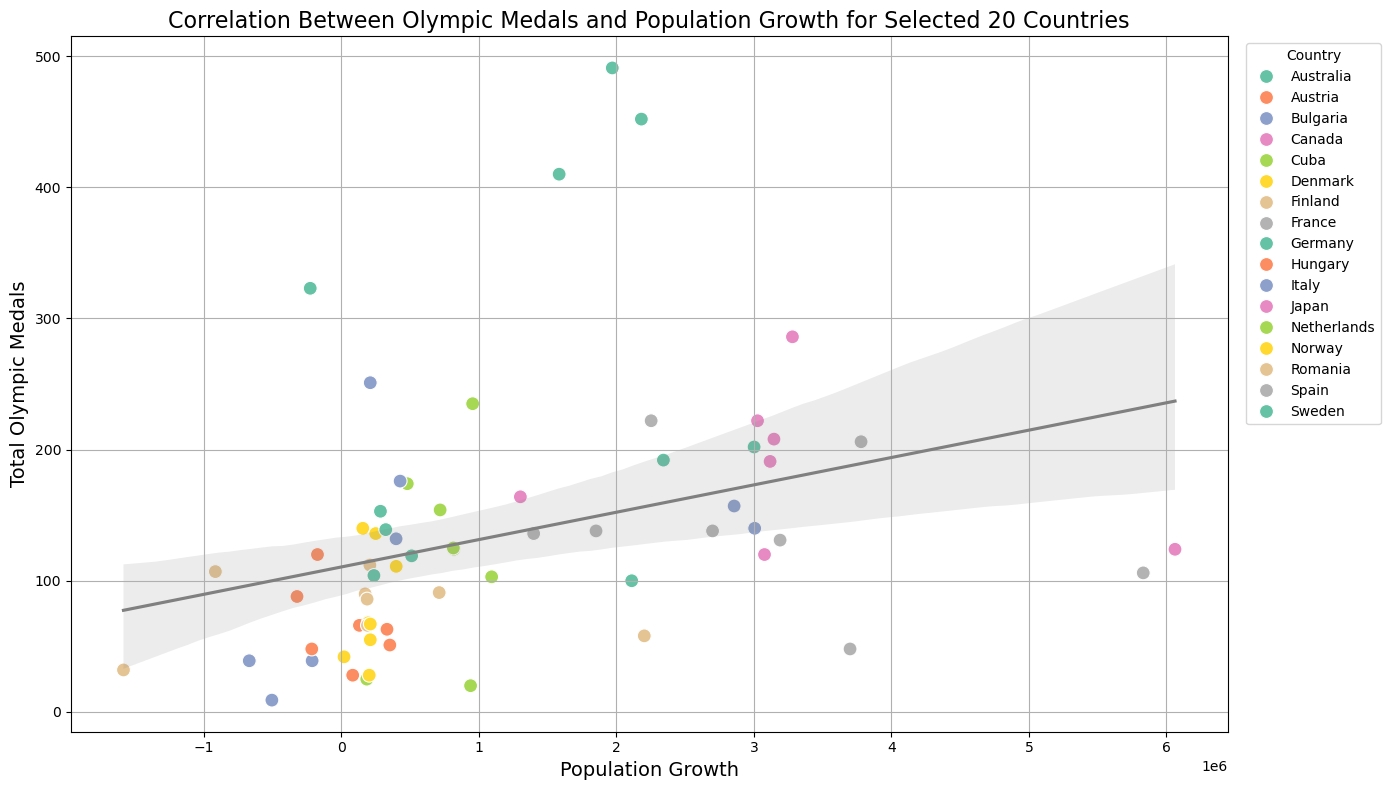

In [127]:
## Graph for Correlation Between Opympic Medals and Population Growth

# Calculate Population Growth (current decade's population - previous decade's population)
population_pf.sort_values(by=['CountryName', 'Decade'], inplace=True)
population_pf['PopulationGrowth'] = population_pf.groupby('CountryName')['Population'].diff()

# Merge Olympic data with Population Growth data
olympic_pop_growth_df = pd.merge(country_mpoints_decade, population_pf[['CountryName', 'Decade', 'PopulationGrowth']], on=['CountryName', 'Decade'])

# Select a subset of countries to make the plot readable
# For example, top 10 countries based on total medal counts
top_n = 20
top_countries = olympic_pop_growth_df.groupby('CountryName')['Points'].sum().nlargest(top_n).index
selected_data = olympic_pop_growth_df[olympic_pop_growth_df['CountryName'].isin(top_countries)]

# Calculate IQR for Population(to filter out outliers(e.g, China))
Q1 = selected_data['PopulationGrowth'].quantile(0.25)
Q3 = selected_data['PopulationGrowth'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

# Filter out outliers
filtered_data = selected_data[(selected_data['PopulationGrowth'] >= (Q1 - threshold)) & (selected_data['PopulationGrowth'] <= (Q3 + threshold))]

# Create the scatter plot
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=filtered_data, x='PopulationGrowth', y='Points', hue='CountryName', palette='Set2', s=100)

# Add a regression line
sns.regplot(data=filtered_data, x='PopulationGrowth', y='Points', scatter=False, color='gray')

plt.title(f'Correlation Between Olympic Medals and Population Growth for Selected {top_n} Countries', fontsize=16)
plt.xlabel('Population Growth', fontsize=14)
plt.ylabel('Total Olympic Medals', fontsize=14)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()


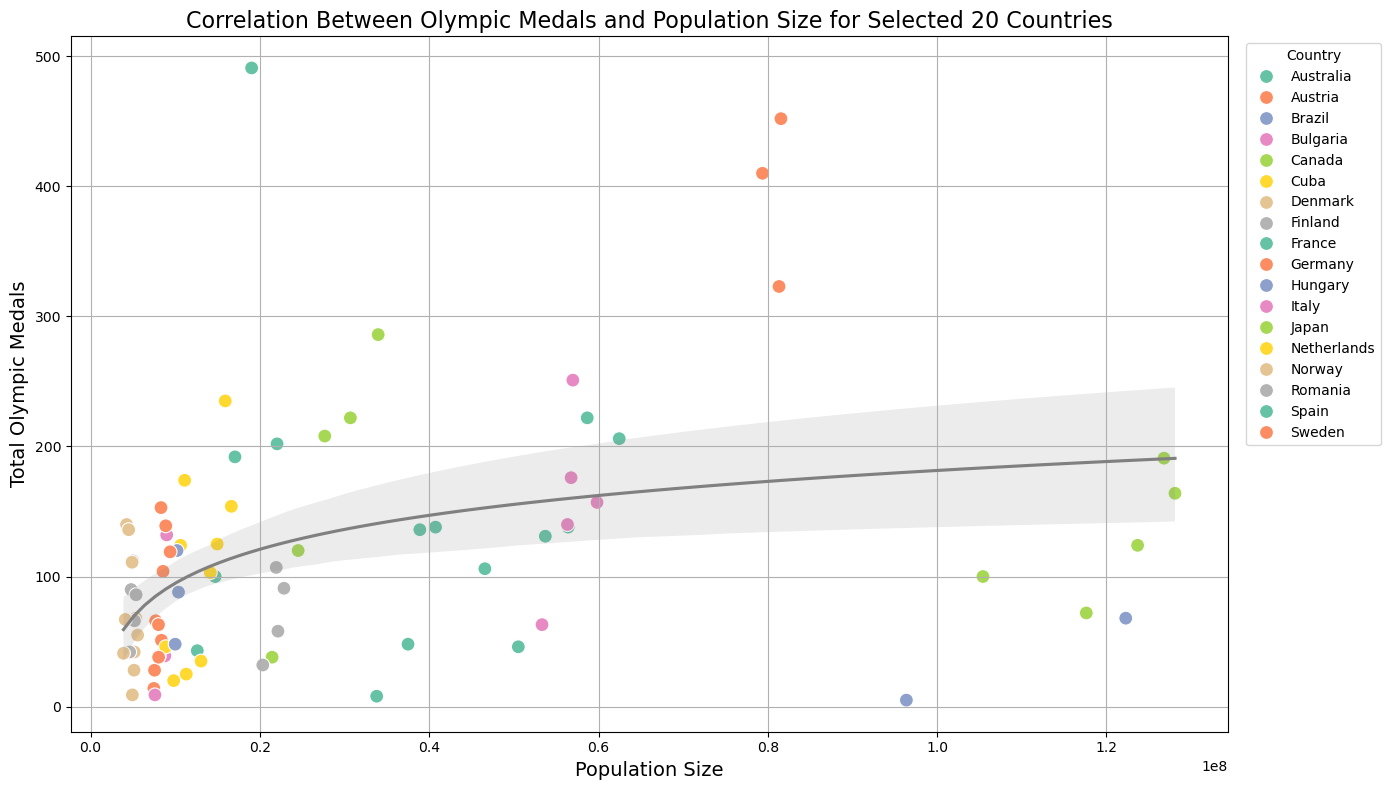

In [128]:
## Graph for Correlation Between Opympic Medals and Population Growth

# Aggregate the total number of medals by country and decade
country_mpoints_decade = olympic_gdp_df.groupby(['CountryName', 'Decade'])['Points'].count().reset_index()

# Aggregate population data by country and decade
country_population_decade = population_pf.groupby(['CountryName', 'Decade'])['Population'].mean().reset_index()

# Merge the medals and population data
medals_population_merged = pd.merge(country_mpoints_decade, country_population_decade, on=['CountryName', 'Decade'])

# Select a subset of countries for visualization
top_n = 20

top_countries = medals_population_merged.groupby('CountryName')['Points'].sum().nlargest(top_n).index
selected_data = medals_population_merged[medals_population_merged['CountryName'].isin(top_countries)]

# Calculate IQR for Population(to filter out outliers(e.g, China))
Q1 = selected_data['Population'].quantile(0.25)
Q3 = selected_data['Population'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

# Filter out outliers
filtered_data = selected_data[(selected_data['Population'] >= (Q1 - threshold)) & (selected_data['Population'] <= (Q3 + threshold))]

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=filtered_data, x='Population', y='Points', hue='CountryName', palette='Set2', s=100)

# Add a regression line
sns.regplot(data=filtered_data, x='Population', y='Points', scatter=False, color='gray', logx=True)

plt.title(f'Correlation Between Olympic Medals and Population Size for Selected {top_n} Countries', fontsize=16)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Total Olympic Medals', fontsize=14)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.01, 1), loc=2)
plt.tight_layout()
plt.show()


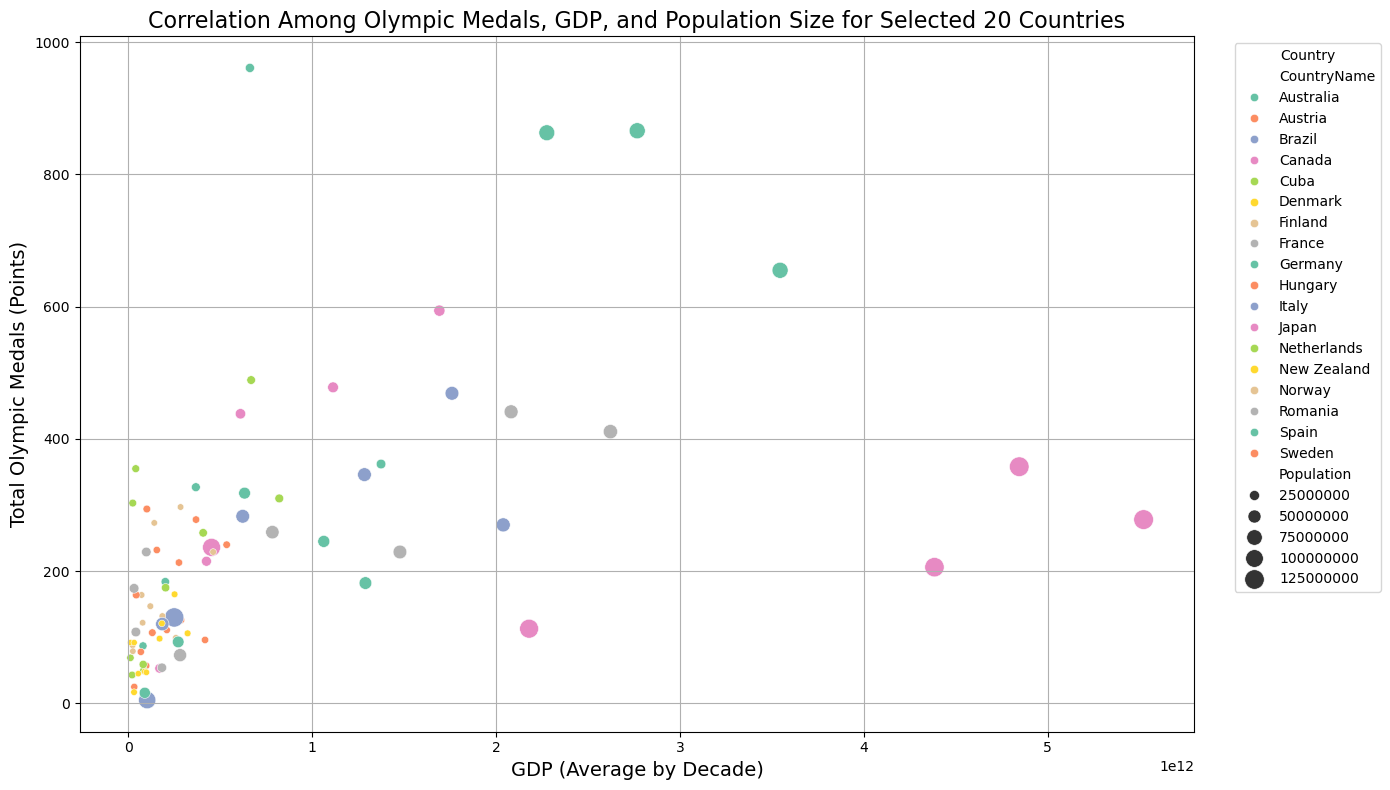

In [129]:
## Graph for Correlation Among the three datasets

# Aggregate the total number of medals by country and decade
country_medals_decade = olympic_gdp_df.groupby(['CountryName', 'Decade'])['Points'].sum().reset_index()

# Aggregate population data by country and decade
country_population_decade = population_pf.groupby(['CountryName', 'Decade'])['Population'].mean().reset_index()

# Aggregate GDP data by country and decade
country_gdp_decade = olympic_gdp_df.groupby(['CountryName', 'Decade'])['GDP'].mean().reset_index()

# Merge the datasets
medals_gdp_pop_merged = pd.merge(country_medals_decade, country_population_decade, on=['CountryName', 'Decade'])
medals_gdp_pop_merged = pd.merge(medals_gdp_pop_merged, country_gdp_decade, on=['CountryName', 'Decade'])

# Select a subset of countries for visualization
top_n = 20
top_countries = medals_gdp_pop_merged.groupby('CountryName')['Points'].sum().nlargest(top_n).index
selected_data = medals_gdp_pop_merged[medals_gdp_pop_merged['CountryName'].isin(top_countries)]

# Calculate IQR for Population(to filter out outliers(e.g, China))
Q1 = selected_data['Population'].quantile(0.25)
Q3 = selected_data['Population'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

# Filter out outliers
filtered_data = selected_data[(selected_data['Population'] >= (Q1 - threshold)) & (selected_data['Population'] <= (Q3 + threshold))]

# Create the scatter plot
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=filtered_data, x='GDP', y='Points', size='Population', hue='CountryName', sizes=(20, 200), palette='Set2')

plt.title(f'Correlation Among Olympic Medals, GDP, and Population Size for Selected {top_n} Countries', fontsize=16)
plt.xlabel('GDP (Average by Decade)', fontsize=14)
plt.ylabel('Total Olympic Medals (Points)', fontsize=14)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.03, 1), loc=2)
plt.tight_layout()
plt.show()
